In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [23]:
catalog.list()

['train',
 'test',
 'sample_submission',
 'modeling_data',
 'inference_data',
 'regressor',
 'parameters',
 'params:model_options',
 'params:model_options.test_size',
 'params:model_options.random_state',
 'params:model_options.features',
 'params:col_maps',
 'params:col_maps.TARGET_COL',
 'params:col_maps.ID_COL']

In [24]:
train = catalog.load('train')

[07/25/23 21:25:40] INFO     Loading data from 'train' (CSVDataSet)...                          ]8;id=638114;file:///Users/mauricioaraujo/anaconda3/envs/spaceship/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=953681;file:///Users/mauricioaraujo/anaconda3/envs/spaceship/lib/python3.9/site-packages/kedro/io/data_catalog.py#345\345]8;;\

In [25]:
parameters = catalog.load('parameters')

[07/25/23 21:25:48] INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=222082;file:///Users/mauricioaraujo/anaconda3/envs/spaceship/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=672451;file:///Users/mauricioaraujo/anaconda3/envs/spaceship/lib/python3.9/site-packages/kedro/io/data_catalog.py#345\345]8;;\

In [26]:
ID_COL = parameters['col_maps']['ID_COL']
TARGET_COL = parameters['col_maps']['TARGET_COL']

categorical_cols = (
    train
    .select_dtypes(include=['object', 'bool'])
    .columns
    .difference([ID_COL, TARGET_COL])
    .tolist()
)

numerical_cols = (
    train
    .select_dtypes(include=['int64', 'float64'])
    .columns
    .difference([ID_COL, TARGET_COL])
    .tolist()
)

# Numeric Cols

In [10]:
train[numerical_cols]

,Age,FoodCourt,RoomService,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,9.0,109.0,25.0,549.0,44.0
2,58.0,3576.0,43.0,0.0,6715.0,49.0
3,33.0,1283.0,0.0,371.0,3329.0,193.0
4,16.0,70.0,303.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,6819.0,0.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,1049.0,0.0,0.0,353.0,3235.0


In [12]:
train[numerical_cols].describe()

,Age,FoodCourt,RoomService,ShoppingMall,Spa,VRDeck
count,8514.000000,8510.000000,8512.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,458.077203,224.687617,173.729169,311.138778,304.854791
std,14.489021,1611.489240,666.717663,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,76.000000,47.000000,27.000000,59.000000,46.000000
max,79.000000,29813.000000,14327.000000,23492.000000,22408.000000,24133.000000


<Axes: >

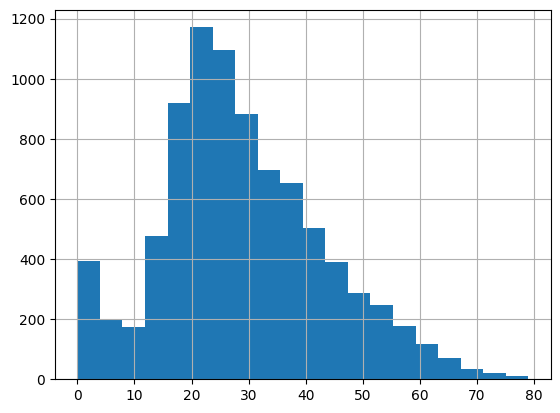

In [14]:
train["Age"].hist(bins=20)

# Categorical Cols

In [11]:
train[categorical_cols]

,Cabin,CryoSleep,Destination,HomePlanet,Name,VIP
0,B/0/P,False,TRAPPIST-1e,Europa,Maham Ofracculy,False
1,F/0/S,False,TRAPPIST-1e,Earth,Juanna Vines,False
2,A/0/S,False,TRAPPIST-1e,Europa,Altark Susent,True
3,A/0/S,False,TRAPPIST-1e,Europa,Solam Susent,False
4,F/1/S,False,TRAPPIST-1e,Earth,Willy Santantines,False
...,...,...,...,...,...,...
8688,A/98/P,False,55 Cancri e,Europa,Gravior Noxnuther,True
8689,G/1499/S,True,PSO J318.5-22,Earth,Kurta Mondalley,False
8690,G/1500/S,False,TRAPPIST-1e,Earth,Fayey Connon,False
8691,E/608/S,False,55 Cancri e,Europa,Celeon Hontichre,False


## Cabin Handling

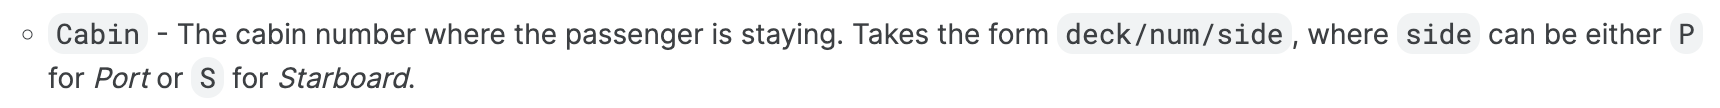

In [27]:
train["Cabin"].values[0]

'B/0/P'

In [32]:
train[["Cabin_Deck", "Cabin_Num", "Cabin_Side"]] = train["Cabin"].str.split('/', expand=True)

In [38]:
train["Cabin_Deck"].value_counts()

Cabin_Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

In [57]:
cabin_num_counts = (
    train
    .groupby("Cabin_Num")
    [["Cabin_Deck"]]
    .count()
    .reset_index()
    .rename(columns={"Cabin_Deck": "People_in_Cabin_Num"})
)
cabin_num_counts

,Cabin_Num,People_in_Cabin_Num
0,0,18
1,1,15
2,10,12
3,100,12
4,1000,6
...,...,...
1812,995,3
1813,996,1
1814,997,2
1815,998,4


In [60]:
cabin_deck_counts = (
    train
    .groupby("Cabin_Deck")
    [["Cabin_Num"]]
    .count()
    .reset_index()
    .rename(columns={"Cabin_Num": "People_in_Cabin_Deck"})
)
cabin_deck_counts

,Cabin_Deck,People_in_Cabin_Deck
0,A,256
1,B,779
2,C,747
3,D,478
4,E,876
5,F,2794
6,G,2559
7,T,5


## Exploring Names

In [84]:
train[categorical_cols].head()

,Cabin,CryoSleep,Destination,HomePlanet,Name,VIP
0,B/0/P,False,TRAPPIST-1e,Europa,Maham Ofracculy,False
1,F/0/S,False,TRAPPIST-1e,Earth,Juanna Vines,False
2,A/0/S,False,TRAPPIST-1e,Europa,Altark Susent,True
3,A/0/S,False,TRAPPIST-1e,Europa,Solam Susent,False
4,F/1/S,False,TRAPPIST-1e,Earth,Willy Santantines,False


In [83]:
pd.Series([np.array(l).shape[0] for l in train["Name"].str.split(" ").values if np.array(l).shape]).value_counts()

2    8493
Name: count, dtype: int64

There is only 1 name and 1 nickname

In [85]:
train["Nickname"] = train["Name"].str.split(" ").str[1]

In [88]:
train["Nickname"].value_counts()

Nickname
Casonston     18
Oneiles       16
Domington     15
Litthews      15
Browlerson    14
              ..
Covale         1
Dun            1
Witalnerod     1
Deryplinet     1
Sionerorly     1
Name: count, Length: 2217, dtype: int64

In [89]:
family_size = (
    train
    .groupby("Nickname")
    [["Name"]]
    .count()
    .reset_index()
    .rename(columns={"Name": "Family_Size"})
)
family_size

,Nickname,Family_Size
0,Acobson,4
1,Acobsond,3
2,Adavisons,9
3,Adkinson,3
4,Admingried,4
...,...,...
2212,Wynneyerson,2
2213,Yanton,7
2214,Yatters,4
2215,Yorkland,11
